In [ ]:
import pandas as pd
import random
import numpy as np

# Define possible values for each category
genders = ["Male", "Female"]
marital_statuses = ["Single", "Married", "Divorced", "Widowed"]
professions = ["Salaried", "Self-Employed", "Business Owner", "Government Employee", "Student", "Retired"]
health_conditions = ["Healthy", "Smoker", "Diabetic", "Heart Condition", "Cancer Survivor"]
policy_categories = {
    "Protection": ["SBI Life - eShield Next", "SBI Life - Smart Shield", "SBI Life - Saral Jeevan Bima"],
    "Savings": ["SBI Life - Smart Platina Plus", "SBI Life - Smart Bachat Plus", "SBI Life - New Smart Samriddhi"],
    "ULIP": ["SBI Life - eWealth Insurance", "SBI Life - Smart Wealth Assure"],
    "Retirement": ["SBI Life - Retire Smart", "SBI Life - Smart Annuity Plus"],
    "Money Back": ["SBI Life - Smart Money Back Gold", "SBI Life - Smart Money Planner"],
    "Child": ["SBI Life - Smart Scholar Plus", "SBI Life - Smart Champ Insurance"]
}

# Function to recommend policy based on customer profile
def recommend_policy(age, income, marital_status, dependents, profession, health_condition):
    if age < 30:
        return random.choice(policy_categories["Protection"])  # Young customers often prefer term insurance
    elif 30 <= age <= 45:
        if income > 800000:
            return random.choice(policy_categories["ULIP"])  # High-income customers prefer investment-linked plans
        elif dependents > 0:
            return random.choice(policy_categories["Savings"])  # Savings plans for family security
        else:
            return random.choice(policy_categories["Protection"])  # Term insurance for protection
    elif 45 < age <= 60:
        if marital_status == "Married" and dependents > 0:
            return random.choice(policy_categories["Money Back"])  # Regular income benefits
        else:
            return random.choice(policy_categories["Retirement"])  # Retirement plans
    else:
        return random.choice(policy_categories["Retirement"])  # Senior customers prefer pension plans

# Generate synthetic data
num_samples = 1000
data = []

for _ in range(num_samples):
    age = random.randint(18, 70)
    gender = random.choice(genders)
    marital_status = random.choice(marital_statuses)
    dependents = random.randint(0, 4)
    income = random.randint(200000, 3000000)  # Income between ₹2L to ₹30L
    savings = random.randint(50000, 1500000)  # Savings between ₹50K to ₹15L
    profession = random.choice(professions)
    health_condition = random.choice(health_conditions)

    # Get policy recommendation
    recommended_policy = recommend_policy(age, income, marital_status, dependents, profession, health_condition)

    # Append to dataset
    data.append([age, gender, marital_status, dependents, income, savings, profession, health_condition, recommended_policy])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Age", "Gender", "Marital_Status", "Dependents", "Income", "Savings",
                                 "Profession", "Health_Condition", "Recommended_Policy"])

# Save dataset to CSV
df.to_csv("sbi_life_customer_data.csv", index=False)

print("Dataset created successfully! 🎉")


Dataset created successfully! 🎉


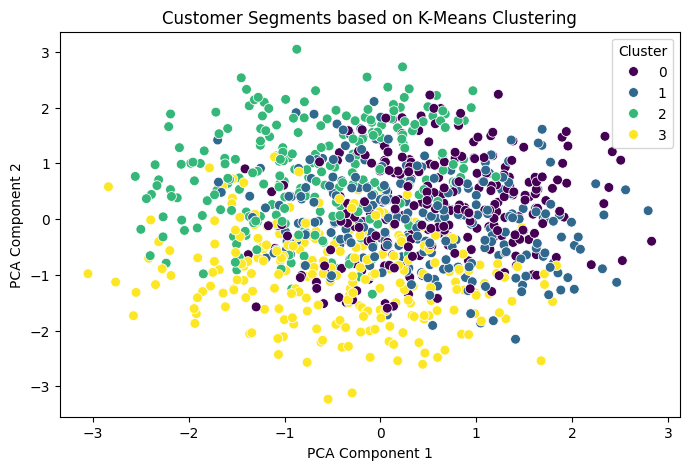

K-Means clustering complete! 🚀


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("sbi_life_customer_data.csv")

# Drop the "Recommended_Policy" column since it's not used for clustering
df.drop(columns=["Recommended_Policy"], inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "Marital_Status", "Profession", "Health_Condition"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store label encoders for later decoding if needed

# Scale numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):  # Testing from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


# Choose optimal K (e.g., from the Elbow plot, let's assume it's 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize clusters using PCA (reducing to 2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments based on K-Means Clustering")
plt.legend(title="Cluster")
plt.show()

# Save clustered data
df.to_csv("sbi_life_clustered_data.csv", index=False)
print("K-Means clustering complete! 🚀")


In [ ]:
cluster_summary = df.groupby("Cluster").mean()
cluster_summary


,Age,Gender,Marital_Status,Dependents,Income,Savings,Profession,Health_Condition,PCA1,PCA2
Cluster,,,,,,,,,,
0,46.031373,0.0,2.329412,1.909804,1.560643e+06,921984.105882,2.337255,2.176471,0.604836,0.222435
1,51.454902,1.0,1.592157,1.647059,1.826842e+06,748007.525490,1.364706,2.007843,0.463284,0.013912
2,43.742857,0.0,0.722449,1.991837,1.705201e+06,561865.477551,2.689796,1.840816,-0.682457,0.766981
3,35.612245,1.0,1.502041,2.175510,1.551635e+06,803753.963265,3.653061,1.995918,-0.429259,-1.012975


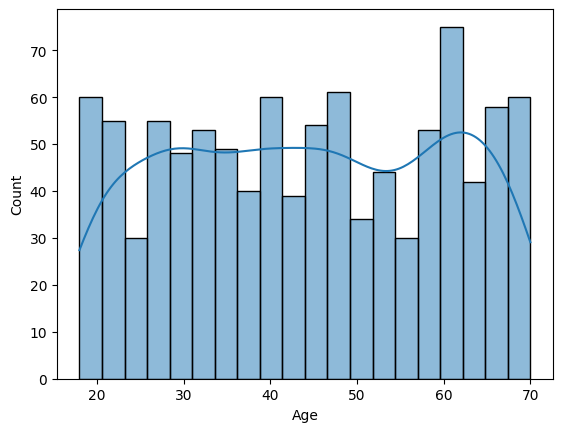

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Age"], bins=20, kde=True)
plt.show()


In [ ]:
df.var()  # Identify which feature has the highest spread


,0
Age,2.408132e+02
Gender,2.502503e-01
Marital_Status,1.175150e+00
Dependents,2.060877e+00
Income,6.482806e+11
Savings,1.717696e+11
Profession,2.832829e+00
Health_Condition,1.870822e+00
Cluster,1.250851e+00
PCA1,1.115332e+00


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
columns_to_scale = ["Age", "Income", "Savings", "Dependents", "Profession", "Health_Condition"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the first few rows to check the scaling
df.head()


,Age,Gender,Marital_Status,Dependents,Income,Savings,Profession,Health_Condition,Cluster,PCA1,PCA2
0,1.592416,0,2,0.050179,-0.786523,-1.631766,-0.296030,-1.468076,2,-0.676766,2.302488
1,-1.502283,1,2,-1.343687,1.235494,1.158423,-1.484908,0.726357,1,1.176667,-1.823767
2,-0.470717,1,0,1.444046,1.204260,-0.709178,-0.296030,-0.736598,3,-1.543956,0.374111
3,1.012160,1,1,-1.343687,1.149893,-0.850675,-0.296030,-1.468076,1,-0.928657,0.400807
4,-0.277298,0,2,0.050179,1.416205,-0.692159,-1.484908,0.726357,0,0.513154,0.986589


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standard Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)  # df is your original dataset (before scaling)


In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters
k = 4  # Change based on your optimal k

# Run K-Means on the standardized data
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_df)  # Now scaled_df is defined

# View updated cluster summary
cluster_summary = df.groupby("Cluster").mean()
cluster_summary


,Age,Gender,Marital_Status,Dependents,Income,Savings,Profession,Health_Condition,PCA1,PCA2
Cluster,,,,,,,,,,
0,0.109792,0.000000,2.317647,-0.023614,-0.131392,0.400868,-0.100215,0.129701,0.612145,0.217224
1,-0.651291,0.917969,1.472656,0.088293,-0.151942,0.188465,0.709407,0.040597,-0.409666,-1.058991
2,0.451466,1.000000,1.692308,-0.265526,0.252149,0.071858,-0.672000,0.063651,0.577070,-0.083364
3,0.129766,0.121569,0.709804,0.178634,0.052546,-0.656013,0.004686,-0.228866,-0.730419,0.922419


In [ ]:
cluster_summary = df.groupby("Cluster").mean()
cluster_summary


,Age,Gender,Marital_Status,Dependents,Income,Savings,Profession,Health_Condition,PCA1,PCA2
Cluster,,,,,,,,,,
0,0.109792,0.000000,2.317647,-0.023614,-0.131392,0.400868,-0.100215,0.129701,0.612145,0.217224
1,-0.651291,0.917969,1.472656,0.088293,-0.151942,0.188465,0.709407,0.040597,-0.409666,-1.058991
2,0.451466,1.000000,1.692308,-0.265526,0.252149,0.071858,-0.672000,0.063651,0.577070,-0.083364
3,0.129766,0.121569,0.709804,0.178634,0.052546,-0.656013,0.004686,-0.228866,-0.730419,0.922419


In [ ]:
policy_mapping = {
    0: ["SBI Life - Smart Power Insurance", "SBI Life - eWealth Insurance"],  # Young professionals
    1: ["SBI Life - Smart Bachat Plus", "SBI Life - Smart Scholar Plus"],    # Middle-aged, family focus
    2: ["SBI Life - Retire Smart", "SBI Life - Smart Annuity Plus"],         # Retired individuals
    3: ["SBI Life - Smart Shield", "SBI Life - Saral Jeevan Bima"]           # Lower-income, protection-focused
}


In [ ]:
df['Recommended_Policies'] = df['Cluster'].map(policy_mapping)
df[['Cluster', 'Recommended_Policies']]


,Cluster,Recommended_Policies
0,3,"[SBI Life - Smart Shield, SBI Life - Saral Jee..."
1,2,"[SBI Life - Retire Smart, SBI Life - Smart Ann..."
2,3,"[SBI Life - Smart Shield, SBI Life - Saral Jee..."
3,2,"[SBI Life - Retire Smart, SBI Life - Smart Ann..."
4,0,"[SBI Life - Smart Power Insurance, SBI Life - ..."
...,...,...
995,3,"[SBI Life - Smart Shield, SBI Life - Saral Jee..."
996,2,"[SBI Life - Retire Smart, SBI Life - Smart Ann..."
997,0,"[SBI Life - Smart Power Insurance, SBI Life - ..."
998,2,"[SBI Life - Retire Smart, SBI Life - Smart Ann..."


In [ ]:
# Display a few random customers and their clusters
df.sample(10)[['Age', 'Income', 'Savings', 'Profession', 'Cluster', 'Recommended_Policies']]


,Age,Income,Savings,Profession,Cluster,Recommended_Policies
899,-1.179918,-0.565249,0.525735,-0.890469,2,"[SBI Life - Retire Smart, SBI Life - Smart Ann..."
643,-1.566756,0.076762,0.373902,-0.890469,0,"[SBI Life - Smart Power Insurance, SBI Life - ..."
521,1.205578,-1.166788,-1.237025,-1.484908,2,"[SBI Life - Retire Smart, SBI Life - Smart Ann..."
880,-1.050972,0.393035,0.989472,0.892847,1,"[SBI Life - Smart Bachat Plus, SBI Life - Smar..."
926,1.527943,-1.545085,-1.685676,-0.296030,2,"[SBI Life - Retire Smart, SBI Life - Smart Ann..."
621,-0.277298,-0.290844,1.058221,0.298408,0,"[SBI Life - Smart Power Insurance, SBI Life - ..."
572,-0.212825,-0.370740,-1.182733,1.487286,3,"[SBI Life - Smart Shield, SBI Life - Saral Jee..."
413,0.883214,1.651719,0.895015,-0.296030,2,"[SBI Life - Retire Smart, SBI Life - Smart Ann..."
892,1.656889,0.522397,0.174459,0.892847,2,"[SBI Life - Retire Smart, SBI Life - Smart Ann..."
530,0.045067,-0.324470,1.594886,-1.484908,0,"[SBI Life - Smart Power Insurance, SBI Life - ..."


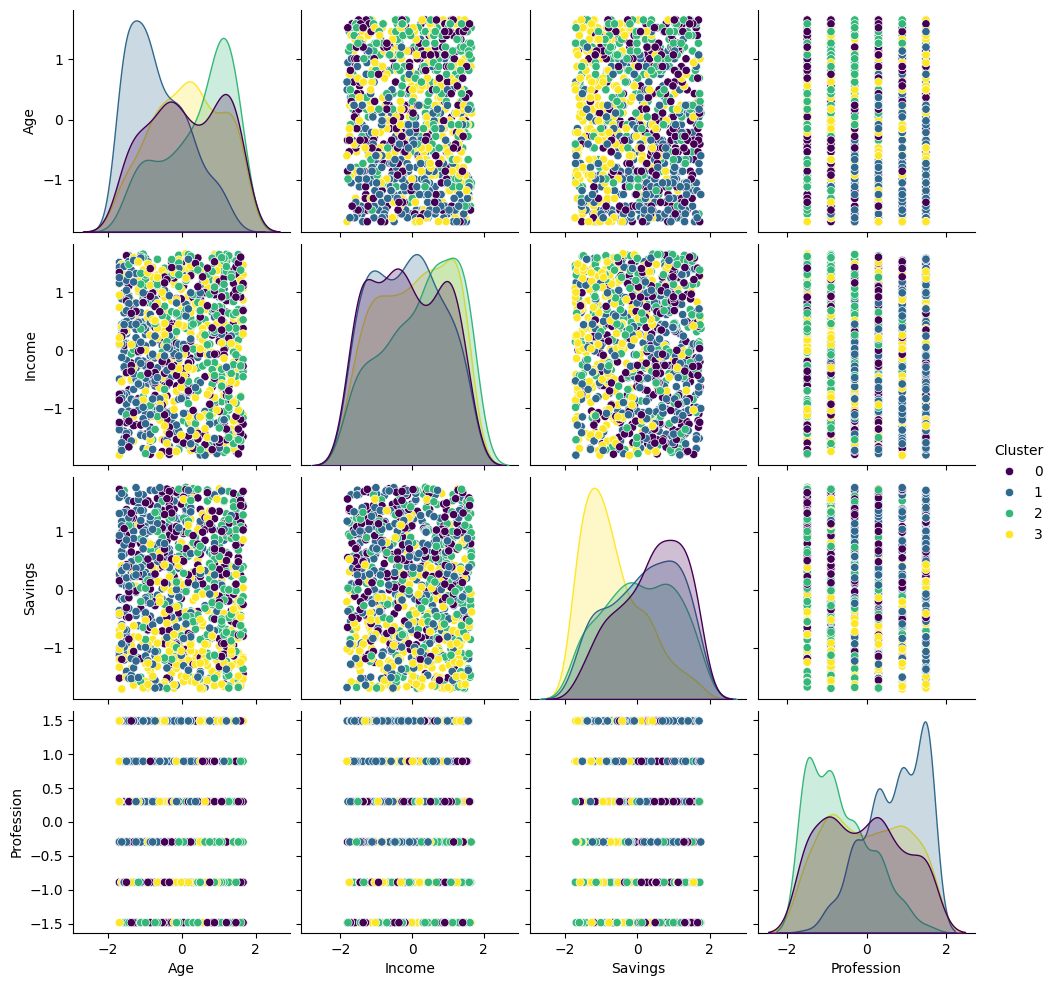

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize clusters in feature space
sns.pairplot(df, hue="Cluster", vars=["Age", "Income", "Savings", "Profession"], palette="viridis")
plt.show()


Accuracy: 0.9150
Precision: 0.9192
Recall: 0.9100


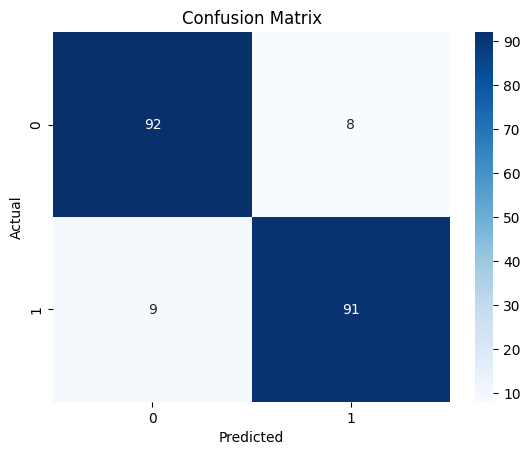

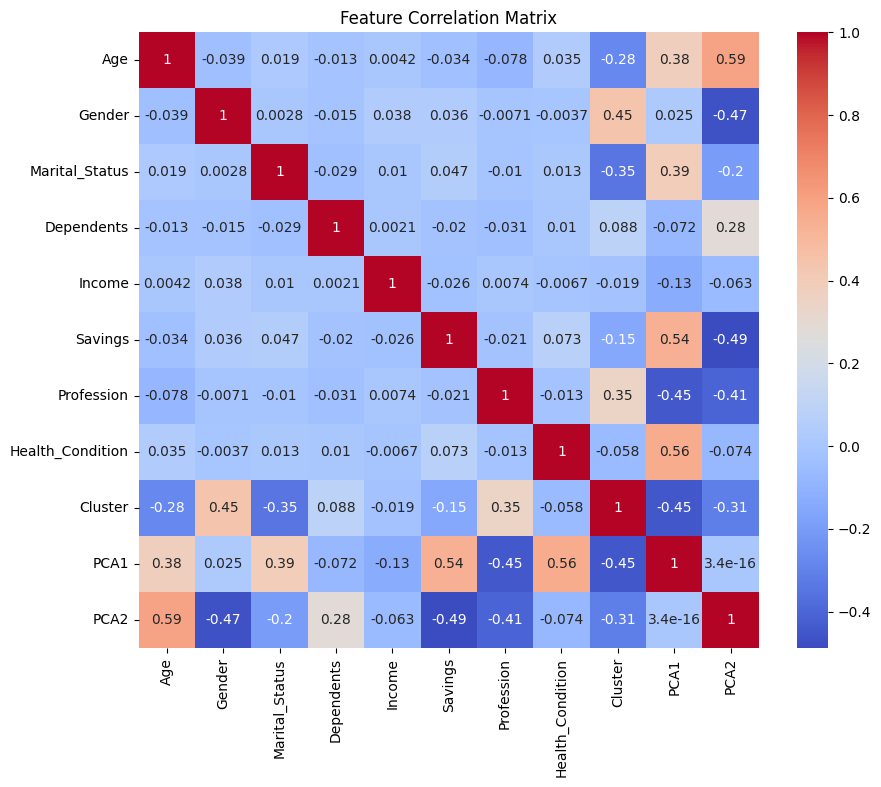

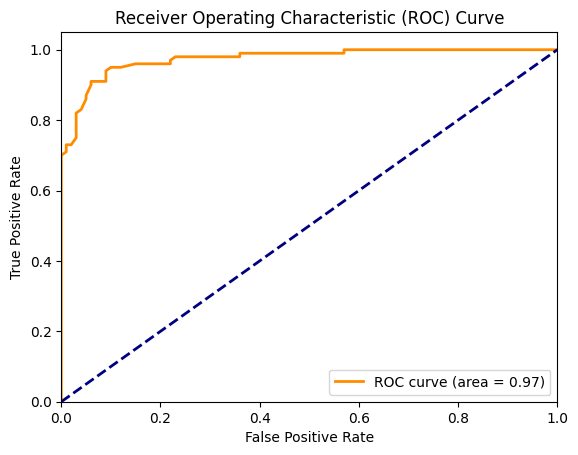

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('sbi_life_clustered_data.csv')

# Automatically select the last column as target and encode if continuous
y = data.iloc[:, -1]
if y.dtype == 'float64' or y.dtype == 'int64':
    # Binarize continuous target (e.g., using median as threshold)
    y = (y > y.median()).astype(int)
else:
    # Encode categorical target
    y = LabelEncoder().fit_transform(y)

X = data.iloc[:, :-1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] if clf.n_classes_ > 1 else clf.predict_proba(X_test)[:, 0]

# Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot feature correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()